Text(0.5, 1.0, 'Generated Data')

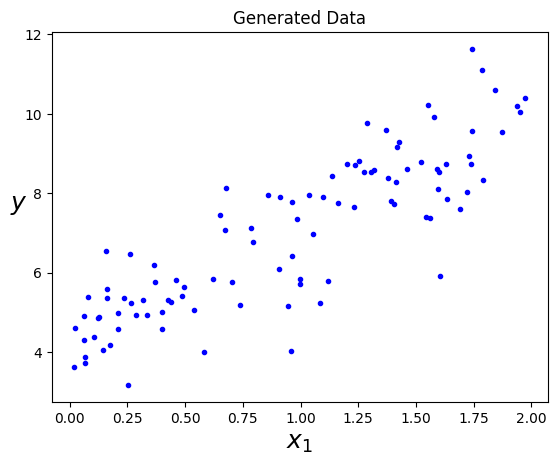

In [34]:
# Linear Regression

import numpy as np

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("Generated Data")


In [35]:
# Linear Regression using Normal Equation
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance and concatenate matrix
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(f"theta_best: {theta_best}")

theta_best: [[4.26096238]
 [2.86634411]]


y_predict: [[4.26096238]
 [9.9936506 ]]


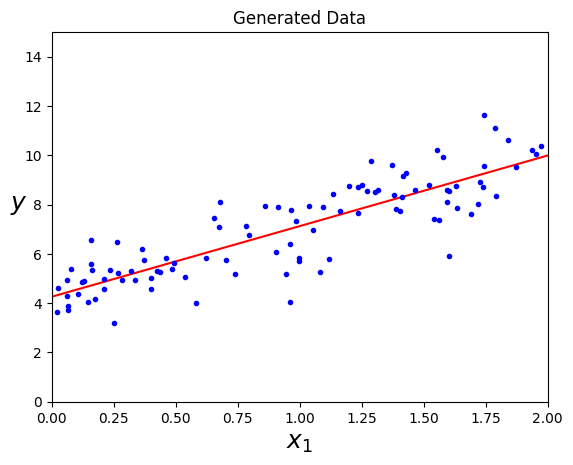

In [36]:
# Make predictions using theta_best
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(f"y_predict: {y_predict}")

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("Generated Data")
plt.axis([0, 2, 0, 15])
plt.show()

In [37]:
# Performing Linear Regression using Scikit-Learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(f"lin_reg.intercept_, lin_reg.coef_: {lin_reg.intercept_, lin_reg.coef_}")
print(f"lin_reg.predict(X_new): {lin_reg.predict(X_new)}")

# We prefer SVD to compute the inverse of X_b
''' # SVD is more efficient and numerically stable, and it supports matrix with singular values tha are close to zero
SVD Process: X = U * Sigma * V^T 
X+ = V * Sigma+ * U^T
where Sigma+ is the pseudoinverse of Sigma
Sigma+ is computed by taking Sigma and setting to zero all values smaller than a tiny threshold value, then replacing all the non-zero values with their inverse, and finally transposing the resulting matrix
np.linalg.pinv() computes the pseudoinverse directly

SVD Process : In SVD we compute three matrices U, Sigma, V^T such that X = U * Sigma * V^T, where V^T is the transpose of V.
U and V are orthogonal matrices, which means that their inverse is their transpose
Sigma is a diagonal matrix, with the values of the diagonal being the singular values of X

U and V are computed using np.linalg.svd() function, mathematicall U is the matrix of the eigenvectors of X^T * X, and V is the matrix of the eigenvectors of X * X^T
and sigma is the diagonal matrix of the singular values of X, which are the square roots of the eigenvalues of X^T * X
once we have the matrices U, Sigma, V, we can compute the pseudoinverse of X using the formula X+ = V * Sigma+ * U^T

we then use the pseudoinverse to compute the value of theta that minimizes the cost function. Cost function is the mean squared error
'''

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(f"theta_best_svd: {theta_best_svd}")



lin_reg.intercept_, lin_reg.coef_: (array([4.26096238]), array([[2.86634411]]))
lin_reg.predict(X_new): [[4.26096238]
 [9.9936506 ]]
theta_best_svd: [[4.26096238]
 [2.86634411]]


In [38]:
# Gradient Descent
'''
Gradient Descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems
The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function
It measures the local gradient of the error function with regards to the parameter vector theta, and it goes in the direction of descending gradient
Once the gradient is zero, you have reached a minimum

Convergence Rate: The size of the steps is determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time
If the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before.
This might make the algorithm diverge, with larger and larger values, failing to find a good solution.
'''

# Batch Gradient Descent
'''
To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter theta_j
In other words, you need to calculate how much the cost function will change if you change theta_j just a little bit
This is called a partial derivative.

Instead of computing the partial derivatives individually, you can compute them all in one go. The gradient vector, noted as nabla_theta(MSE(theta)), contains all the partial derivatives of the cost function
matheatically, it looks like this: nabla_theta(MSE(theta)) = 2/m * X^T * (X * theta - y)

Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting nabla_theta(MSE(theta)) from theta
This is where the learning rate hyperparameter comes into play. Multiply the gradient vector by the learning rate to determine the size of the downhill step

Batch Gradient Descent in Machine Learning
Batch Gradient Descent is an optimization algorithm used to minimize the cost function in machine learning, especially in algorithms like linear regression, logistic regression, and neural networks. It works by iteratively updating the model parameters to minimize the error between predicted values and actual values in the dataset.

How Batch Gradient Descent Works:
The primary goal of gradient descent is to find the model parameters (e.g., weights, 
𝑤
w, and bias, 
𝑏
b) that minimize the cost function (or loss function), such as Mean Squared Error (MSE) for regression or cross-entropy for classification. The steps of Batch Gradient Descent are as follows:

Initialize the parameters (weights and biases) with random values.

Compute the cost function using all the training examples. The cost function measures how far the predicted values are from the actual values.

Compute the gradient (the partial derivatives of the cost function with respect to each parameter) using the entire dataset. The gradient tells us in which direction to update the parameters to reduce the error.

Update the parameters by moving them in the direction of the negative gradient (i.e., opposite the direction of the slope of the cost function) using the following formula:

 
Where:

w and b are the parameters (weights and biases) to be updated,
𝛼 is the learning rate that controls the step size of the update,
are the gradients of the cost function with respect to 
 respectively.
Repeat steps 2-4 for a fixed number of iterations (or until convergence), where the model parameters are adjusted in each iteration.

Key Characteristics of Batch Gradient Descent:
Batch Size: In batch gradient descent, the entire training dataset is used to compute the gradients at each step, hence the term "batch."
Convergence: The algorithm continues to update the parameters until the cost function reaches a minimum, ideally converging to a global or local minimum.
Learning Rate: The learning rate (
𝛼
α) is a crucial hyperparameter that affects the speed and stability of convergence. A learning rate that is too large may cause the algorithm to overshoot the minimum, while a learning rate that is too small will slow down the convergence.
Example of Batch Gradient Descent:
Suppose we are training a simple linear regression model to predict house prices based on one feature: house size (in square feet). The dataset consists of multiple examples, and the goal is to minimize the Mean Squared Error (MSE) between predicted prices and actual prices.

Cost Function: The cost function (MSE) for linear regression is:


Iteration: The process is repeated for a number of iterations, updating the weights and biases in each iteration based on the gradients computed using the entire training dataset.

Advantages of Batch Gradient Descent:
Stable Convergence: Since the gradients are computed using the entire dataset, the updates to the parameters are stable and the cost function is guaranteed to decrease (if the learning rate is appropriately chosen).
Global View of the Data: Batch gradient descent takes into account all training examples, so it can more accurately estimate the direction to move the parameters compared to methods that use smaller subsets of the data.
Deterministic: For the same dataset and initialization, batch gradient descent produces the same gradient at each step, leading to consistent results.
Disadvantages of Batch Gradient Descent:
Slow for Large Datasets: Since the entire dataset is used to compute gradients, batch gradient descent can be slow and computationally expensive for large datasets. Every iteration requires a pass over all examples.
Memory Intensive: If the dataset is too large to fit into memory, it may not be feasible to use batch gradient descent.
Convergence Time: Although it provides a stable path toward convergence, it might take a long time to converge, especially if the dataset is very large.
'''


'\nTo implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter theta_j\nIn other words, you need to calculate how much the cost function will change if you change theta_j just a little bit\nThis is called a partial derivative.\n\nInstead of computing the partial derivatives individually, you can compute them all in one go. The gradient vector, noted as nabla_theta(MSE(theta)), contains all the partial derivatives of the cost function\nmatheatically, it looks like this: nabla_theta(MSE(theta)) = 2/m * X^T * (X * theta - y)\n\nOnce you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting nabla_theta(MSE(theta)) from theta\nThis is where the learning rate hyperparameter comes into play. Multiply the gradient vector by the learning rate to determine the size of the downhill step\n\nBatch Gradient Descent in Machine Learning\nBatch Gradient Descent is an optimizat

In [39]:
# Batch Gradient Descent
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(f"theta: {theta}")

theta: [[4.26096238]
 [2.86634411]]


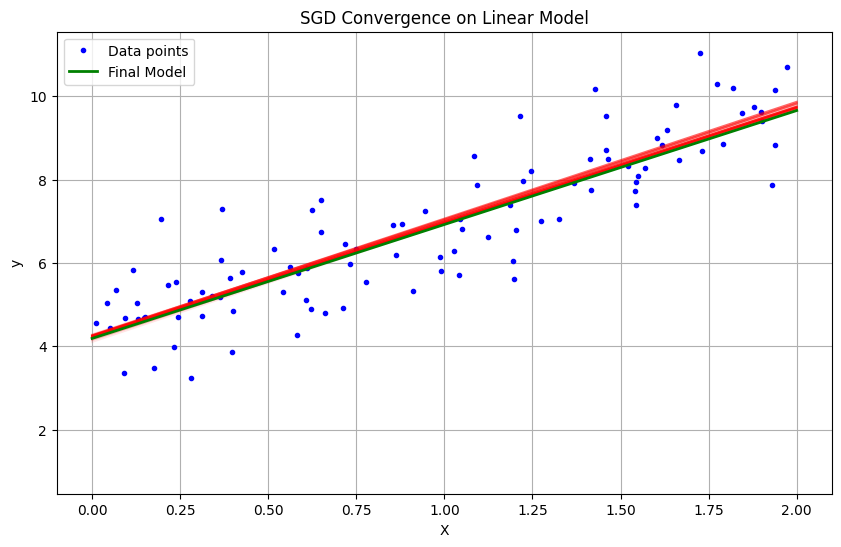

In [40]:
# Stochastic Gradient Descent
'''
Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradients based only on that single instance
This makes the algorithm much faster because it has very little data to manipulate at every iteration
It also makes it possible to train on huge datasets, since only one instance needs to be in memory at each iteration

On the other hand, due to its stochastic nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average
Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down
    
    When the cost function is very irregular, this can actually help the algorithm jump out of local minima, 
    so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does

    Therefore randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum
    One solution to this dilemma is to gradually reduce the learning rate. The steps start out large, then get smaller and smaller, allowing the algorithm to settle at the global minimum
    This process is called simulated annealing, because it resembles the process of annealing in metallurgy where molten metal is slowly cooled down

    The function that determines the learning rate at each iteration is called the learning schedule

    different types of learning schedules:
    constant learning rate schedule - eta = eta0
    inverse scaling learning rate schedule - eta = eta0 / t
    power scheduling learning rate schedule - eta = eta0 / t^c

    step decay learning rate schedule - eta = eta0 * 0.1^(epoch / s)
    exponential decay learning rate schedule - eta = eta0 * exp(-kt)
    time based decay learning rate schedule - eta = eta0 / (1 + kt)
    inverse square root decay learning rate schedule - eta = eta0 / sqrt(t)

    Trdaeof  between higher learning rate and lower learning rate is must. 
    HIgher learning rate will make the algorithm to jump out of local minima, but it will never settle at the minimum. Lower learning rate will make the algorithm to settle at the minimum, but it will take a long time to converge
'''

import numpy as np
import matplotlib.pyplot as plt

# Generate some sample linear data (X and y) for demonstration
np.random.seed(42)
m = 100  # number of examples
X = 2 * np.random.rand(m, 1)  # random input feature
y = 4 + 3 * X + np.random.randn(m, 1)  # linear relation with noise

# Add bias term (x0 = 1) to X
X_b = np.c_[np.ones((m, 1)), X]

# Learning schedule hyperparameters
n_epochs = 50
t0, t1 = 5, 50

# Learning schedule function
def learning_schedule(t):
    return t0 / (t + t1)

# Random initialization of parameters
theta = np.random.randn(2, 1)

# Lists to store theta values for plotting
theta_history = []

# Stochastic Gradient Descent (SGD) loop
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_history.append(theta.copy())

# Plotting the linear model after each iteration of convergence
plt.figure(figsize=(10, 6))
plt.plot(X, y, "b.", label="Data points")
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

# Plot model after several iterations to show the convergence
for i in range(0, len(theta_history), 500):
    y_predict = X_new_b.dot(theta_history[i])
    plt.plot(X_new, y_predict, "r-", alpha=(i+1)/len(theta_history))

# Final model
y_final_predict = X_new_b.dot(theta_history[-1])
plt.plot(X_new, y_final_predict, "g-", label="Final Model", linewidth=2)

plt.xlabel("X")
plt.ylabel("y")
plt.title("SGD Convergence on Linear Model")
plt.legend()
plt.grid(True)
plt.show()





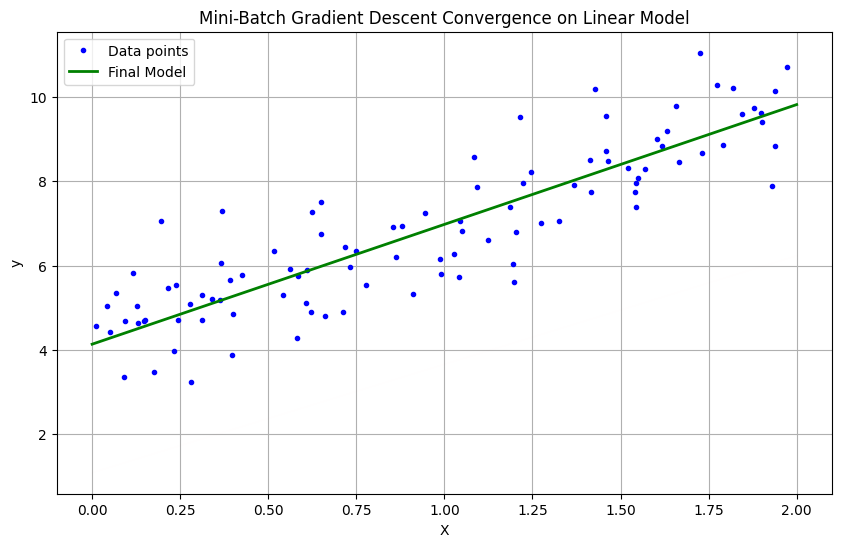

In [41]:
# Mini-batch Gradient Descent

'''
Mini-batch Gradient Descent is a compromise between Batch Gradient Descent and Stochastic Gradient Descent
At each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches

The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs
The algorithm's progress in parameter space is less erratic than with SGD, especially with fairly large mini-batches

Mini-batch GD will end up walking around a bit closer to the minimum than SGD, but it may be harder for it to escape from local minima
'''

# Mini-batch Gradient Descent
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample linear data (X and y) for demonstration
np.random.seed(42)
m = 100  # number of examples
X = 2 * np.random.rand(m, 1)  # random input feature
y = 4 + 3 * X + np.random.randn(m, 1)  # linear relation with noise

# Add bias term (x0 = 1) to X
X_b = np.c_[np.ones((m, 1)), X]

# Hyperparameters for Mini-Batch Gradient Descent
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters
batch_size = 20  # size of each mini-batch

# Learning schedule function
def learning_schedule(t):
    return t0 / (t + t1)

# Random initialization of parameters
theta = np.random.randn(2, 1)

# Lists to store theta values for plotting
theta_history = []

# Mini-Batch Gradient Descent loop
for epoch in range(n_epochs):
    # Shuffle the data at the start of each epoch
    indices = np.random.permutation(m)
    X_b_shuffled = X_b[indices]
    y_shuffled = y[indices]
    
    for i in range(0, m, batch_size):
        # Create mini-batch
        xi = X_b_shuffled[i:i + batch_size]
        yi = y_shuffled[i:i + batch_size]
        
        # Compute gradients
        gradients = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi)
        
        # Update the learning rate
        eta = learning_schedule(epoch * (m // batch_size) + (i // batch_size))
        
        # Update parameters
        theta = theta - eta * gradients
        theta_history.append(theta.copy())

# Plotting the linear model after each iteration of convergence
plt.figure(figsize=(10, 6))
plt.plot(X, y, "b.", label="Data points")
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

# Plot model after several iterations to show the convergence
for i in range(0, len(theta_history), 500):
    y_predict = X_new_b.dot(theta_history[i])
    plt.plot(X_new, y_predict, "r-", alpha=(i + 1) / len(theta_history))

# Final model
y_final_predict = X_new_b.dot(theta_history[-1])
plt.plot(X_new, y_final_predict, "g-", label="Final Model", linewidth=2)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Mini-Batch Gradient Descent Convergence on Linear Model")
plt.legend()
plt.grid(True)
plt.show()



lin_reg.intercept_, lin_reg.coef_: (array([1.78134581]), array([[0.93366893, 0.56456263]]))


Text(0.5, 1.0, 'Quadratic Model using Polynomial Regression')

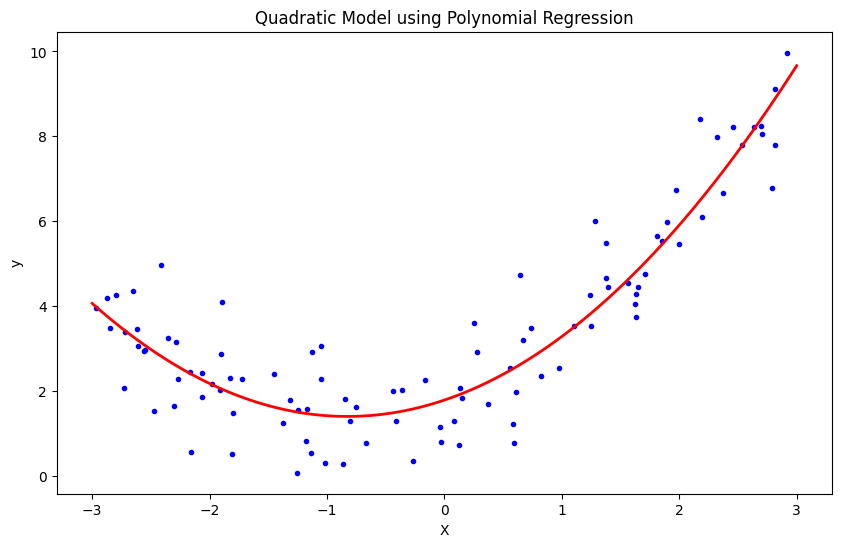

In [42]:
# Summar 
# Batch Gradient Descent: It computes the gradients based on the entire training set. It is slow for large datasets but guarantees convergence to the global minimum.
# Stochastic Gradient Descent: It computes the gradients based on a single random instance. It is fast and can escape local minima but is less stable.
# Mini-batch Gradient Descent: It computes the gradients based on small random sets of instances (mini-batches). It offers a good compromise between Batch GD and Stochastic GD.

# Polynomial Regression
'''
When data is more complex than a simple straight line, we can use a linear model to fit nonlinear data by adding powers of each feature as new features, then training a linear model on this extended set of features
This technique is called Polynomial Regression

Let's generate some nonlinear data, based on a simple quadratic equation

y = 0.5 * x^2 + x + 2 + Gaussian noise
'''

import numpy as np
import matplotlib.pyplot as plt

# Generate some sample nonlinear data (X and y) for demonstration
np.random.seed(42)
m = 100  # number of examples
X = 6 * np.random.rand(m, 1) - 3  # random input feature
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  # quadratic relation with noise


# Polynomial Regression using Scikit-Learn
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]


lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
print(f"lin_reg.intercept_, lin_reg.coef_: {lin_reg.intercept_, lin_reg.coef_}")


import matplotlib.pyplot as plt
def quadratic_function(x):
    return lin_reg.coef_[0][1] * x**2 + lin_reg.coef_[0][0] * x + lin_reg.intercept_[0]


# Plotting the quadratic model
plt.figure(figsize=(10, 6))
plt.plot(X, y, "b.", label="Data points")
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
y_new = quadratic_function(X_new)
plt.plot(X_new, y_new, "r-", label="Quadratic Model", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Quadratic Model using Polynomial Regression")

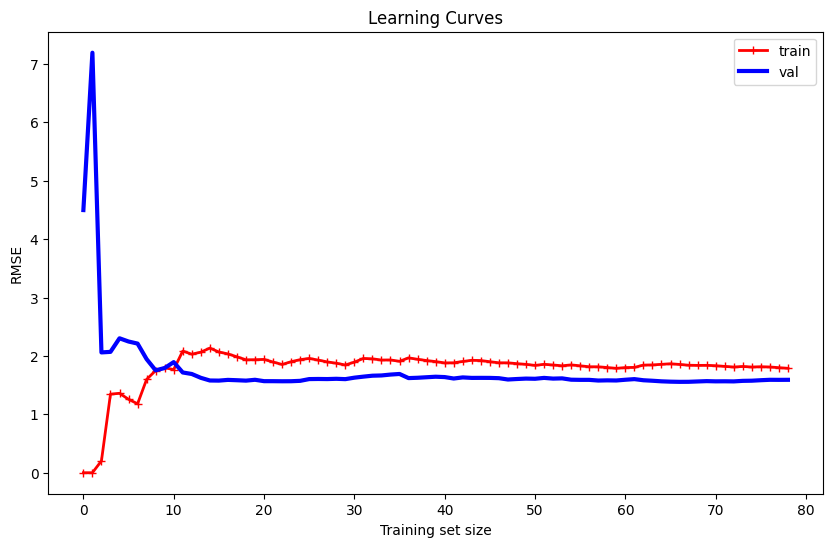

In [43]:
# Learning Curves

# Learning curve for liner regression
'''Linear Regression model is underfitting the data, which means that the features do not provide enough information to make good predictions, or that the model is not powerful enough
The main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model
This model is not regularized, so this rules out the last option

Th lerrning curve for training set is plotted with respect to the training set size, the curver is plotted with respect to the RMSE of the model
When the training set size is small, the model can fit the data perfectly, which is why the error is initially low as the training set size increases, it becomes impossible for the model to fit the data perfectly, and the error goes up until it reaches a plateau, at which point adding new instances to the training set doesn't make the average error much better or worse

Both curves have reached a plateau, they are close and fairly high, which means that the model is underfitting the data
'''

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.title("Learning Curves")

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)


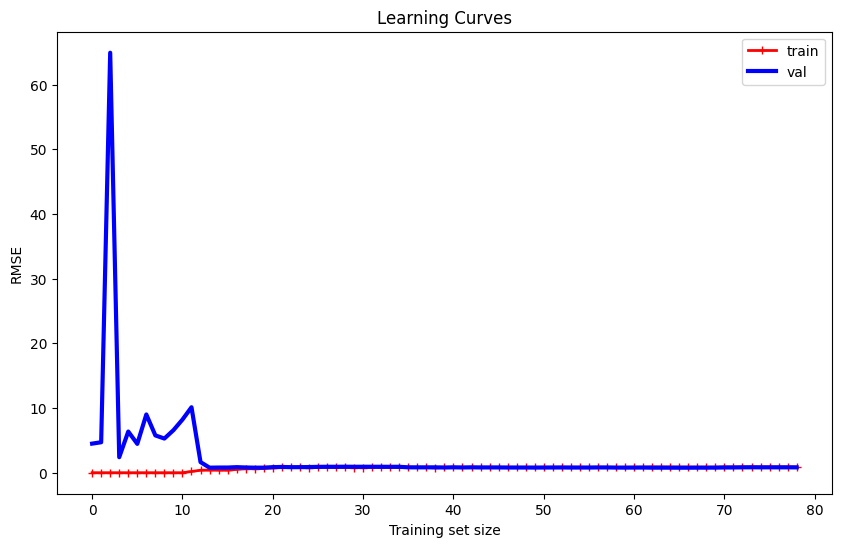

In [44]:
# Learning curve for polynomial regression

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

'\nin this plot we can see that as alpha increases, the model becomes more and more constrained, leading to a flatter and flatter model\nFor very large values of alpha, the model is completely flat, which is a very bad model because it is just the mean of the target values\n\nThe left plot shows Ridge models trained on linear data using different values of alpha and the right plot shows Ridge models trained on polynomial data using different values of alpha\n'

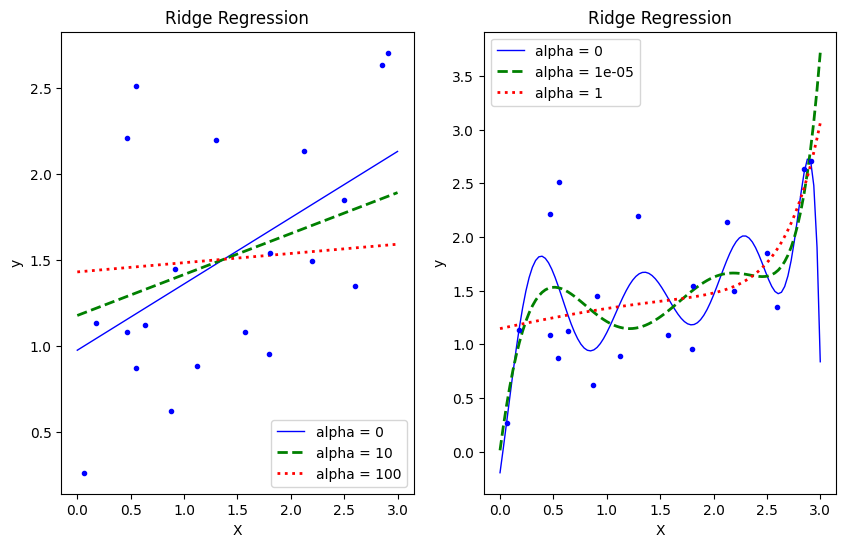

In [45]:
# Regularized Linear Models
'''
Regularization is a technique used to prevent overfitting by adding a penalty term to the cost function
There are three types of regularization techniques:
Ridge Regression (L2 regularization): It adds a penalty term equal to the square of the magnitude of the coefficients
Lasso Regression (L1 regularization): It adds a penalty term equal to the absolute value of the magnitude of the coefficients
Elastic Net: It combines both Ridge and Lasso penalties

The regularization term should only be added to the cost function during training, not during testing
The hyperparameter alpha controls how much you want to regularize the model
If alpha = 0, then Ridge Regression is just Linear Regression
If alpha is very large, then all weights end up very close to zero and the result is a flat line going through the data's mean
'''

# Ridge Regression
'''
Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression
A regularization term equal to alpha * sum(theta^2) is added to the cost function
This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible
The hyperparameter alpha controls how much you want to regularize the model
If alpha = 0, then Ridge Regression is just Linear Regression
If alpha is very large, then all weights end up very close to zero and the result is a flat line going through the data's mean
'''

# plotting ridge regression data fro different values of alpha
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model)
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=f"alpha = {alpha}")
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Ridge Regression")

plt.figure(figsize=(10, 6))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

'''
in this plot we can see that as alpha increases, the model becomes more and more constrained, leading to a flatter and flatter model
For very large values of alpha, the model is completely flat, which is a very bad model because it is just the mean of the target values

The left plot shows Ridge models trained on linear data using different values of alpha and the right plot shows Ridge models trained on polynomial data using different values of alpha
'''


/home/borse_saurabh/ros2_ws/ws_machinel/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.764e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


'\nThe left plot shows Lasso models trained on linear data using different values of alpha and the right plot shows Lasso models trained on polynomial data using different values of alpha\n'

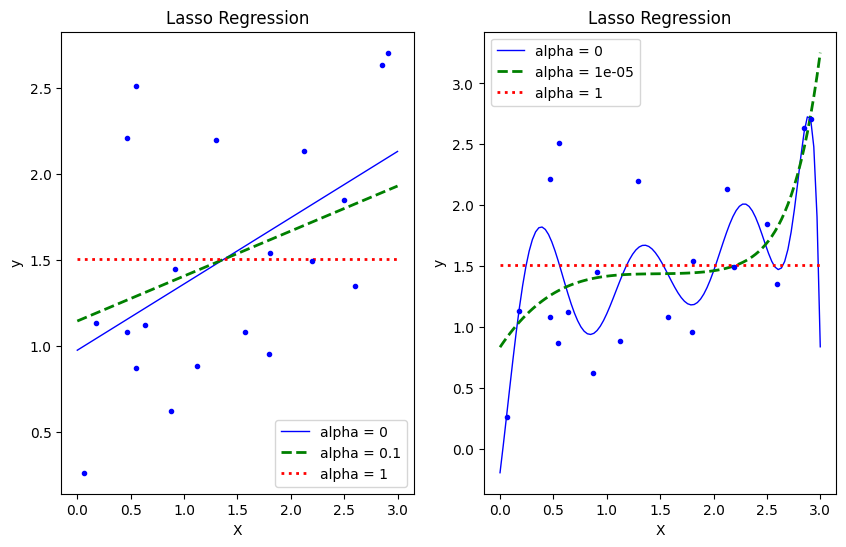

In [46]:
# Lasso Regression
'''
Least Absolute Shrinkage and Selection Operator Regression (Lasso Regression) is another regularized version of Linear Regression
It adds a regularization term equal to alpha * sum(|theta|) to the cost function
An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero)

Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights)
This is useful if you suspect that only a few features actually matter in the model
'''

# plotting lasso regression data fro different values of alpha
from sklearn.linear_model import Lasso

from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model)
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=f"alpha = {alpha}")
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Lasso Regression")

plt.figure(figsize=(10, 6))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

'''
The left plot shows Lasso models trained on linear data using different values of alpha and the right plot shows Lasso models trained on polynomial data using different values of alpha
'''



/home/borse_saurabh/ros2_ws/ws_machinel/lib/python3.12/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/borse_saurabh/ros2_ws/ws_machinel/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/borse_saurabh/ros2_ws/ws_machinel/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.446e+00, tolerance: 9.295e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented i

'\nThe left plot shows Elastic Net models trained on linear data using different values of alpha and l1_ratio and the right plot shows Elastic Net models trained on polynomial data using different values of alpha and l1_ratio\n'

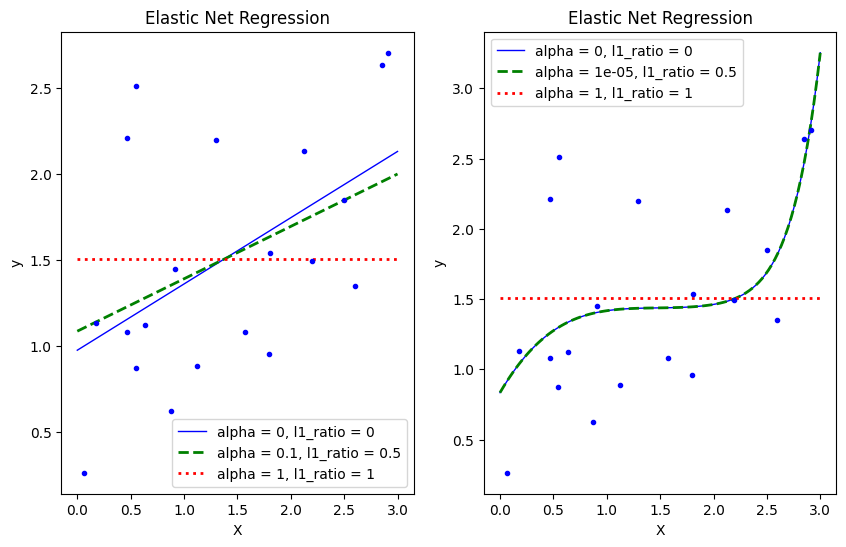

In [47]:
# Elastic Net

'''
Elastic Net is a middle ground between Ridge Regression and Lasso Regression
The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio r
When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression
'''

# plotting elastic net regression data fro different values of alpha
from sklearn.linear_model import ElasticNet

from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, l1_ratios, **model_kargs):
    for alpha, l1_ratio, style in zip(alphas, l1_ratios, ("b-", "g--", "r:")):
        model = model_class(alpha=alpha, l1_ratio=l1_ratio, **model_kargs)
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model)
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=f"alpha = {alpha}, l1_ratio = {l1_ratio}")
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Elastic Net Regression")

plt.figure(figsize=(10, 6))
plt.subplot(121)
plot_model(ElasticNet, polynomial=False, alphas=(0, 0.1, 1), l1_ratios=(0, 0.5, 1), random_state=42)
plt.subplot(122)
plot_model(ElasticNet, polynomial=True, alphas=(0, 10**-5, 1), l1_ratios=(0, 0.5, 1), random_state=42)

'''
The left plot shows Elastic Net models trained on linear data using different values of alpha and l1_ratio and the right plot shows Elastic Net models trained on polynomial data using different values of alpha and l1_ratio
'''

In [48]:
# Early Stopping
'''
Early stopping is a regularization technique used to prevent overfitting
It stops training as soon as the validation error reaches a minimum
With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not
One solution is to stop only after the validation error has been above the minimum for some time, then roll back the model parameters to the point where the validation error was at a minimum
'''

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# Early stopping
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
    
print(f"best_epoch: {best_epoch}")
print(f"best_model: {best_model}")
print(f"minimum_val_error: {minimum_val_error}")



best_epoch: 0
best_model: SGDRegressor(eta0=0.0005, learning_rate='constant', penalty=None,
             warm_start=True)
minimum_val_error: 11.177816027495615


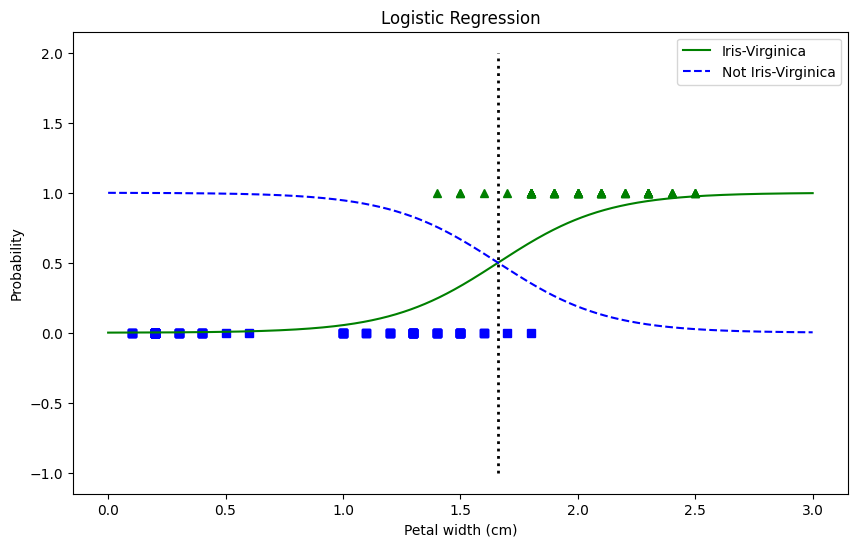

dataset features, ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


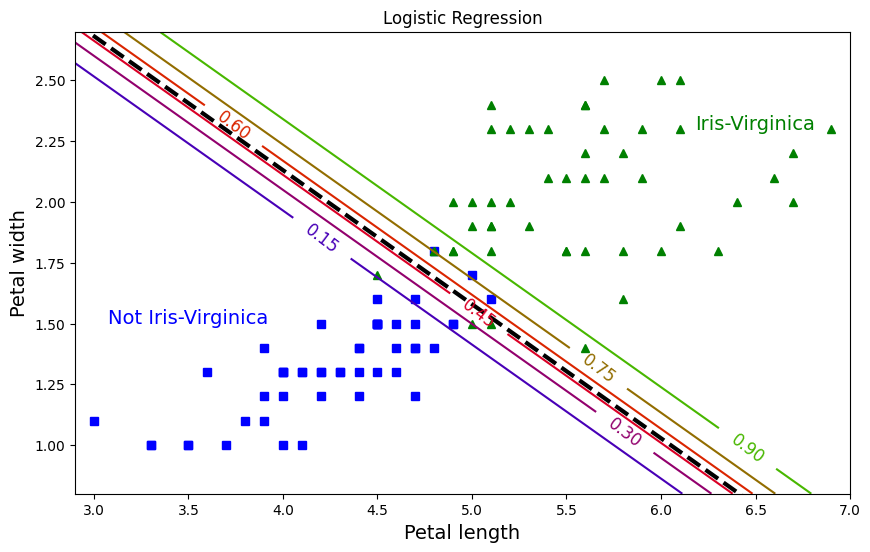

In [61]:
# Logistic Regression
'''
Logistic Regression is commonly used to estimate the probability that an instance belongs to a particular class
If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class, or else it predicts that it does not
This makes it a binary classifier

Logistic Regression model estimated probability (vectorized form):
p = h_theta(X) = sigma(X^T * theta) 
where sigma(.) is the sigmoid function, which outputs a number between 0 and 1

Logistic Regression model prediction:
y_hat = 0 if p < 0.5 else 1

Logistic Regression cost function (log loss):
J(theta) = -1/m * sum(y_i * log(p_i) + (1 - y_i) * log(1 - p_i))

Logistic Regression cost function partial derivatives:
partial_derivative(J(theta)) / partial_derivative(theta_j) = 1/m * sum((sigma(X^T * theta) - y) * X_j)

Logistic Regression cost function gradient vector:
nabla_theta(J(theta)) = 1/m * X^T * (sigma(X^T * theta) - y)

Logistic Regression model training:
The objective is to find the parameter vector theta that minimizes the cost function J(theta)
There is no closed-form equation to compute the value of theta that minimizes the cost function

The cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough)
'''

# Logistic Regression using Scikit-Learn

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2)  # 1 if Iris-Virginica, else 0

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(10, 6))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend()
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.title("Logistic Regression")
plt.show()

'''
The plot shows the logistic regression model's estimated probabilities for flowers with petal widths varying from 0 to 3 cm
The vertical dashed line represents the decision boundary at 1.6 cm, where both probabilities are equal to 0.5
If the petal width is greater than 1.6 cm, the model predicts that the flower is an Iris-Virginica, or else it predicts that it is not
'''

# Logistics regresseion and liner descision boundary

from sklearn import datasets
iris = datasets.load_iris()
print(f"dataset features, {list(iris.keys())}")
print(iris["target"]) 


X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 6))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("Logistic Regression")
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()




/home/borse_saurabh/ros2_ws/ws_machinel/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


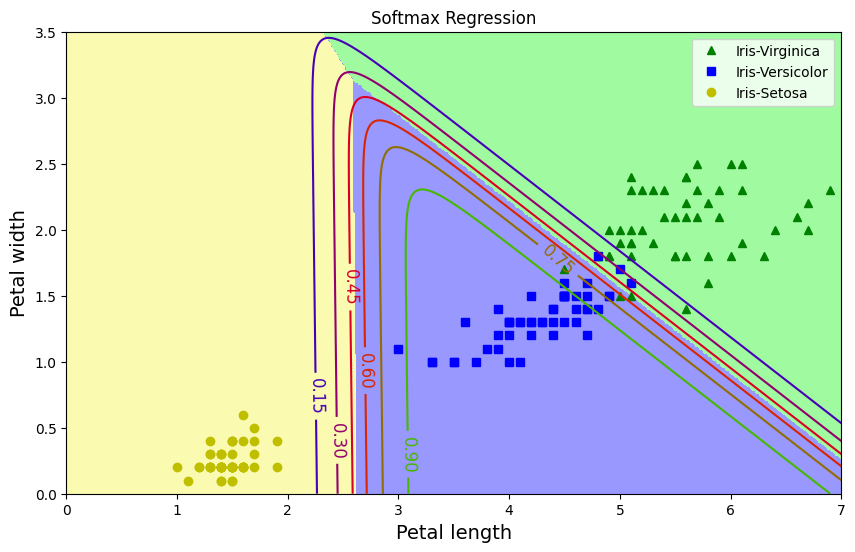

In [62]:
# Softmax Regression

'''
Softmax regression (or multinomial logistic regression) is a generalization of Logistic Regression to support multiple classes directly without having to train and combine multiple binary classifiers
When given an instance x, the Softmax Regression model first computes a score s_k(x) for each class k, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores
The equation to compute s_k(x) is:
s_k(x) = x^T * theta^(k)

The Softmax function computes the estimated probability of each class:
p_k = sigma(s(x))_k = exp(s_k(x)) / sum(exp(s_j(x)) for j=1 to K)

The Softmax Regression model prediction:
y_hat = argmax(sigma(s(x))_k) = argmax(s(x)^T * theta)

The cost function for Softmax Regression is the cross-entropy loss:
J(theta) = -1/m * sum(sum(y_i,k * log(p_i,k)))

The gradient vector of the cost function with respect to theta_k is:
nabla_theta_k(J(theta)) = 1/m * sum((p_i,k - y_i,k) * x_i)

'''

# Softmax Regression using Scikit-Learn

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)

softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)

y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 6))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("Softmax Regression")
plt.legend()
plt.axis([0, 7, 0, 3.5])
plt.show()


